In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("/Users/migashane/CodeUp/Data_Science/telco_churn_classification_project/util_")
import acquire_

In [2]:
telco, query = acquire_.get_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
# percentage of churne
len(telco[telco.churn == "Yes"]) / len(telco)

0.2653698707936959

In [4]:
(len(telco) * 0.2653698707936959) * .8

1495.2000000000003

In [5]:
len(telco) * 0.2653698707936959

1869.0000000000002

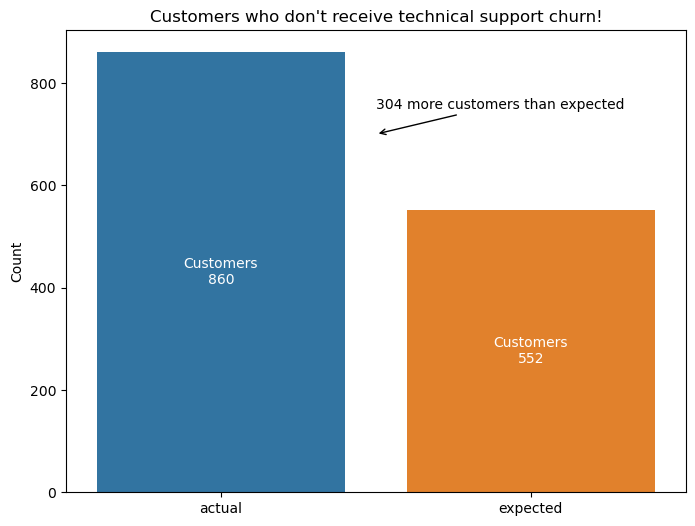

In [6]:
count = [860, 552]
customers = ["actual", "expected"]

fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(x=customers, y=count, capsize=0.2, ax=ax)

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Customers\n%.f', label_type='center', color="w")

# more annotation
plt.annotate(
    # Label and coordinate
    '304 more customers than expected', xy=(.5,700),xytext=(.5,750) ,
    # Custom arrow
    arrowprops=dict(arrowstyle='->',lw=1)
    )

ax.set(ylabel='Count')
ax.set(title="Customers who don't receive technical support churn!")
plt.show()

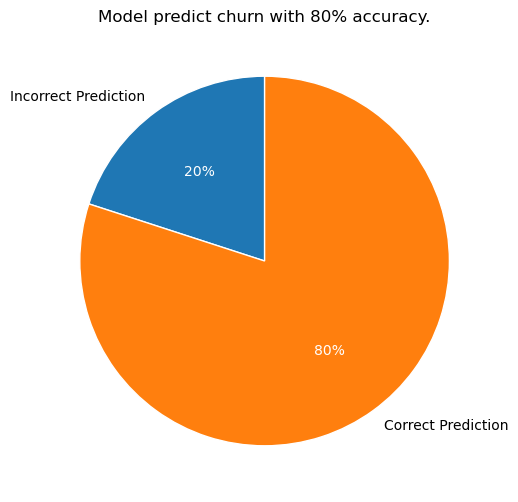

In [7]:
count = [20, 80]
customers = ["Incorrect Prediction", "Correct Prediction"]

fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
patches, texts, autotexts = ax.pie(count, labels=customers, autopct='%.f%%', 
                                   wedgeprops={'edgecolor': 'white'},
                                   startangle=90, textprops={'color': 'white'})

# Set label colors to black
for text in texts:
    text.set_color('black')

ax.set(title="Model predict churn with 80% accuracy.")

plt.show()


Fiber optic monthly contract customers who churn while they do receive tech support with monthly charges more than the median monthly cost and have been with Telco for 24 months or less.

In [41]:
# fiber optic monthly contract customers who churn while the do receive tech support and have monthly charges greater than the medeian monthly charges and have been with telco le24 month or less
churn_with_tech_support = ((telco.contract_type == "Month-to-month") & (telco.internet_service_type == "Fiber optic") & (telco.tech_support == "Yes") & (telco.churn == "Yes") & (telco.monthly_charges > telco.monthly_charges.median()) & (telco.tenure <= 24)).sum()
churn_with_tech_support

81

Fiber optic monthly contract customers who churn while they do **not** receive tech support with monthly charges more than the median monthly cost and have been with Telco for 24 months or less.

In [42]:
# fiber optic monthly contract customers who churn while the do not receive tech support and have monthly charges greater than the medeian monthly charges nd have been with telco le24 month or less
churn_without_tech_support = ((telco.contract_type == "Month-to-month") & (telco.internet_service_type == "Fiber optic") & (telco.tech_support == "No") & (telco.churn == "Yes") & (telco.monthly_charges > telco.monthly_charges.median()) & (telco.tenure <= 24)).sum()
churn_without_tech_support

687

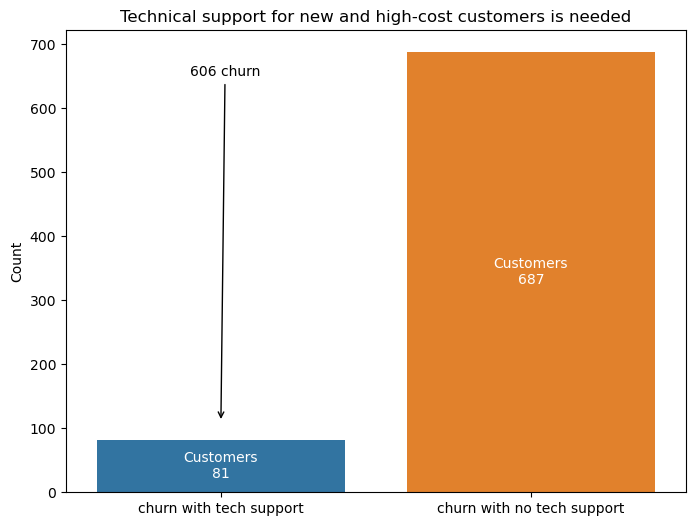

In [54]:
count = [churn_with_tech_support, churn_without_tech_support]
customers = ["churn with tech support", "churn with no tech support"]

fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(x=customers, y=count, capsize=0.2, ax=ax)

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Customers\n%.f', label_type='center', color="w")

# more annotation
plt.annotate(
    # Label and coordinate
    '606 churn', xy=(0,110),xytext=(-.1,650) ,
    # Custom arrow
    arrowprops=dict(arrowstyle='->',lw=1)
    )

ax.set(ylabel='Count')
ax.set(title="Technical support for new and high-cost customers is needed")
plt.show()